# First Deep Learning Model

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets.samples_generator import make_circles

In [3]:
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [4]:
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [5]:
X.shape

(1000, 2)

Text(0.5, 1.0, 'Blue circles and Red crosses')

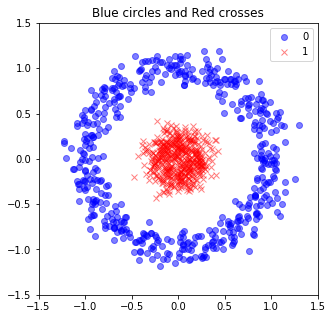

In [6]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [7]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import SGD

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [8]:
model = Sequential() #simple model

In [9]:
model.add(Dense(4, input_shape=(2,), activation='tanh')) #1st model layer 4 neurons taking coordinate 

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dense(1, activation='sigmoid')) #2nd model layer with 1 node, no need to define input shape as it is  output of first layer

In [11]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy']) 
#Stochastic gradient descent with learning rate move half of gradient to avoid bouncing, 
# based and minimising loss of binary crossentropy, accuracy is just a metric use for reporting, 
# Metrics could be use later if we have different models to compare them using crossvalidation for example
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X, y, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1000/1000 [==============================] - 1s 531us/sample - loss: 0.6681 - acc: 0.6280
Epoch 2/20
1000/1000 [==============================] - 0s 87us/sample - loss: 0.5734 - acc: 0.8060
Epoch 3/20
1000/1000 [==============================] - 0s 98us/sample - loss: 0.4497 - acc: 0.9070
Epoch 4/20
1000/1000 [==============================] - 0s 63us/sample - loss: 0.3304 - acc: 0.9650
Epoch 5/20
1000/1000 [==============================] - 0s 64us/sample - loss: 0.2416 - acc: 0.9950
Epoch 6/20
1000/1000 [==============================] - 0s 65us/sample - loss: 0.1848 - acc: 0.9990
Epoch 7/20
1000/1000 [==============================] - 0s 65us/sample - loss: 0.1476 - acc: 1.0000
Epoch 8/20
1000/1000 [==============================] - 0s 64us/sample - loss: 0.1212 - acc: 1.0000
Epoch 9/20
1000/1000 [==============================] - 0s 66us/sample - loss: 0.1022 - acc: 1.0000
Epoch 10/20
1000/1000 [============================

In [13]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

Text(0.5, 1.0, 'Blue circles and Red crosses')

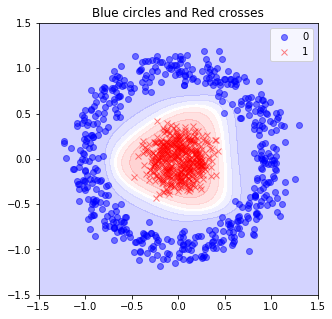

In [14]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model2 = Sequential()

In [32]:
model2.add(Dense(10, input_shape=(2,), activation='tanh'))
model2.add(Dense(5, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy']) 
model2.fit(X, y, epochs=20)

Epoch 1/20
1000/1000 [==============================] - 1s 717us/sample - loss: 0.6918 - acc: 0.5140
Epoch 2/20
1000/1000 [==============================] - 0s 88us/sample - loss: 0.6851 - acc: 0.5470
Epoch 3/20
1000/1000 [==============================] - 0s 72us/sample - loss: 0.6674 - acc: 0.6400
Epoch 4/20
1000/1000 [==============================] - 0s 82us/sample - loss: 0.6344 - acc: 0.7420
Epoch 5/20
1000/1000 [==============================] - 0s 85us/sample - loss: 0.5585 - acc: 0.8860
Epoch 6/20
1000/1000 [==============================] - 0s 76us/sample - loss: 0.4351 - acc: 0.9630
Epoch 7/20
1000/1000 [==============================] - 0s 91us/sample - loss: 0.2801 - acc: 0.9990
Epoch 8/20
1000/1000 [==============================] - 0s 78us/sample - loss: 0.1638 - acc: 1.0000
Epoch 9/20
1000/1000 [==============================] - 0s 76us/sample - loss: 0.1012 - acc: 1.0000
Epoch 10/20
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0680 - acc: 1.000

Text(0.5, 1.0, 'Blue circles and Red crosses')

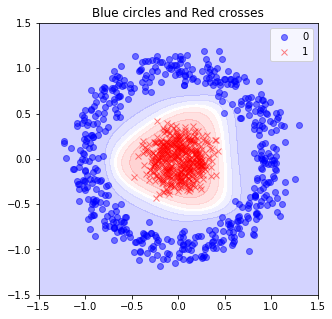

In [33]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [34]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
